In [62]:
import sklearn
import sklearn.datasets
import sklearn.metrics as metrics
import sklearn.model_selection
import sklearn.tree as tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#define etimated squared difference equation
import scipy.integrate as integrate
import graphviz
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from pandas import read_csv
from sklearn import preprocessing
from IPython.display import Image

In [63]:
pd.options.mode.chained_assignment = None

In [64]:
# read testing dataset
data = pd.read_csv('../data/HousingData.csv')

# create dataframe 
df = pd.DataFrame(data)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [65]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

#encoder = preprocessing.OneHotEncoder(sparse=None)
#df_enc = encoder.fit_transform(df[categorical_columns])

y = pd.DataFrame(data['MEDV'])
df = df.drop(['MEDV'], axis=1)

In [66]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=0.2, random_state=42)

t = tree.DecisionTreeRegressor(random_state=42, max_depth=4)
rf_Model = RandomForestRegressor(random_state=42, max_depth=4,max_samples=404)


In [67]:
rf_Model = rf_Model.fit(X_train,y_train)
print(rf_Model)

C:\Users\jjacq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=4, max_samples=404, random_state=42)


In [68]:
t = t.fit(X_train, y_train)

In [69]:
y_pred = t.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

12.34810129705156


In [70]:
rf_pred = rf_Model.predict(X_test)
mse = metrics.mean_squared_error(y_test, rf_pred)
print(mse)

10.474601639535036


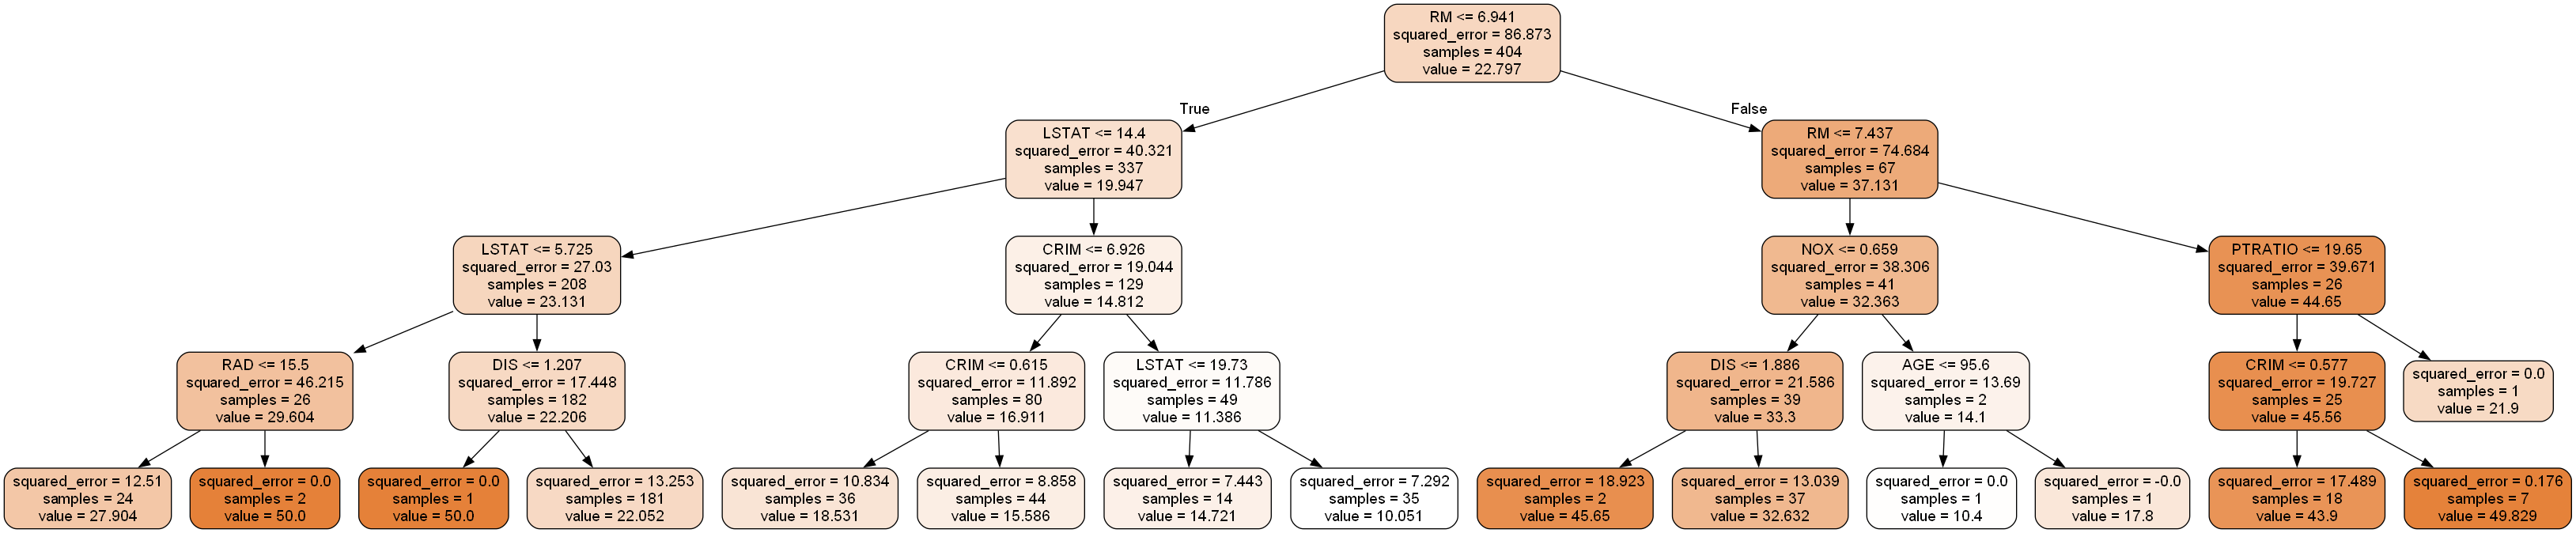

In [71]:
# generate a graph of the generated tree/grove
tree_graph = tree.export_graphviz(t, out_file=None, filled=True, rounded=True, feature_names=df.columns)
graph = graphviz.Source(tree_graph, format='png')
graph.render('decision_tree_graphviz')
Image(filename='decision_tree_graphviz.png') 

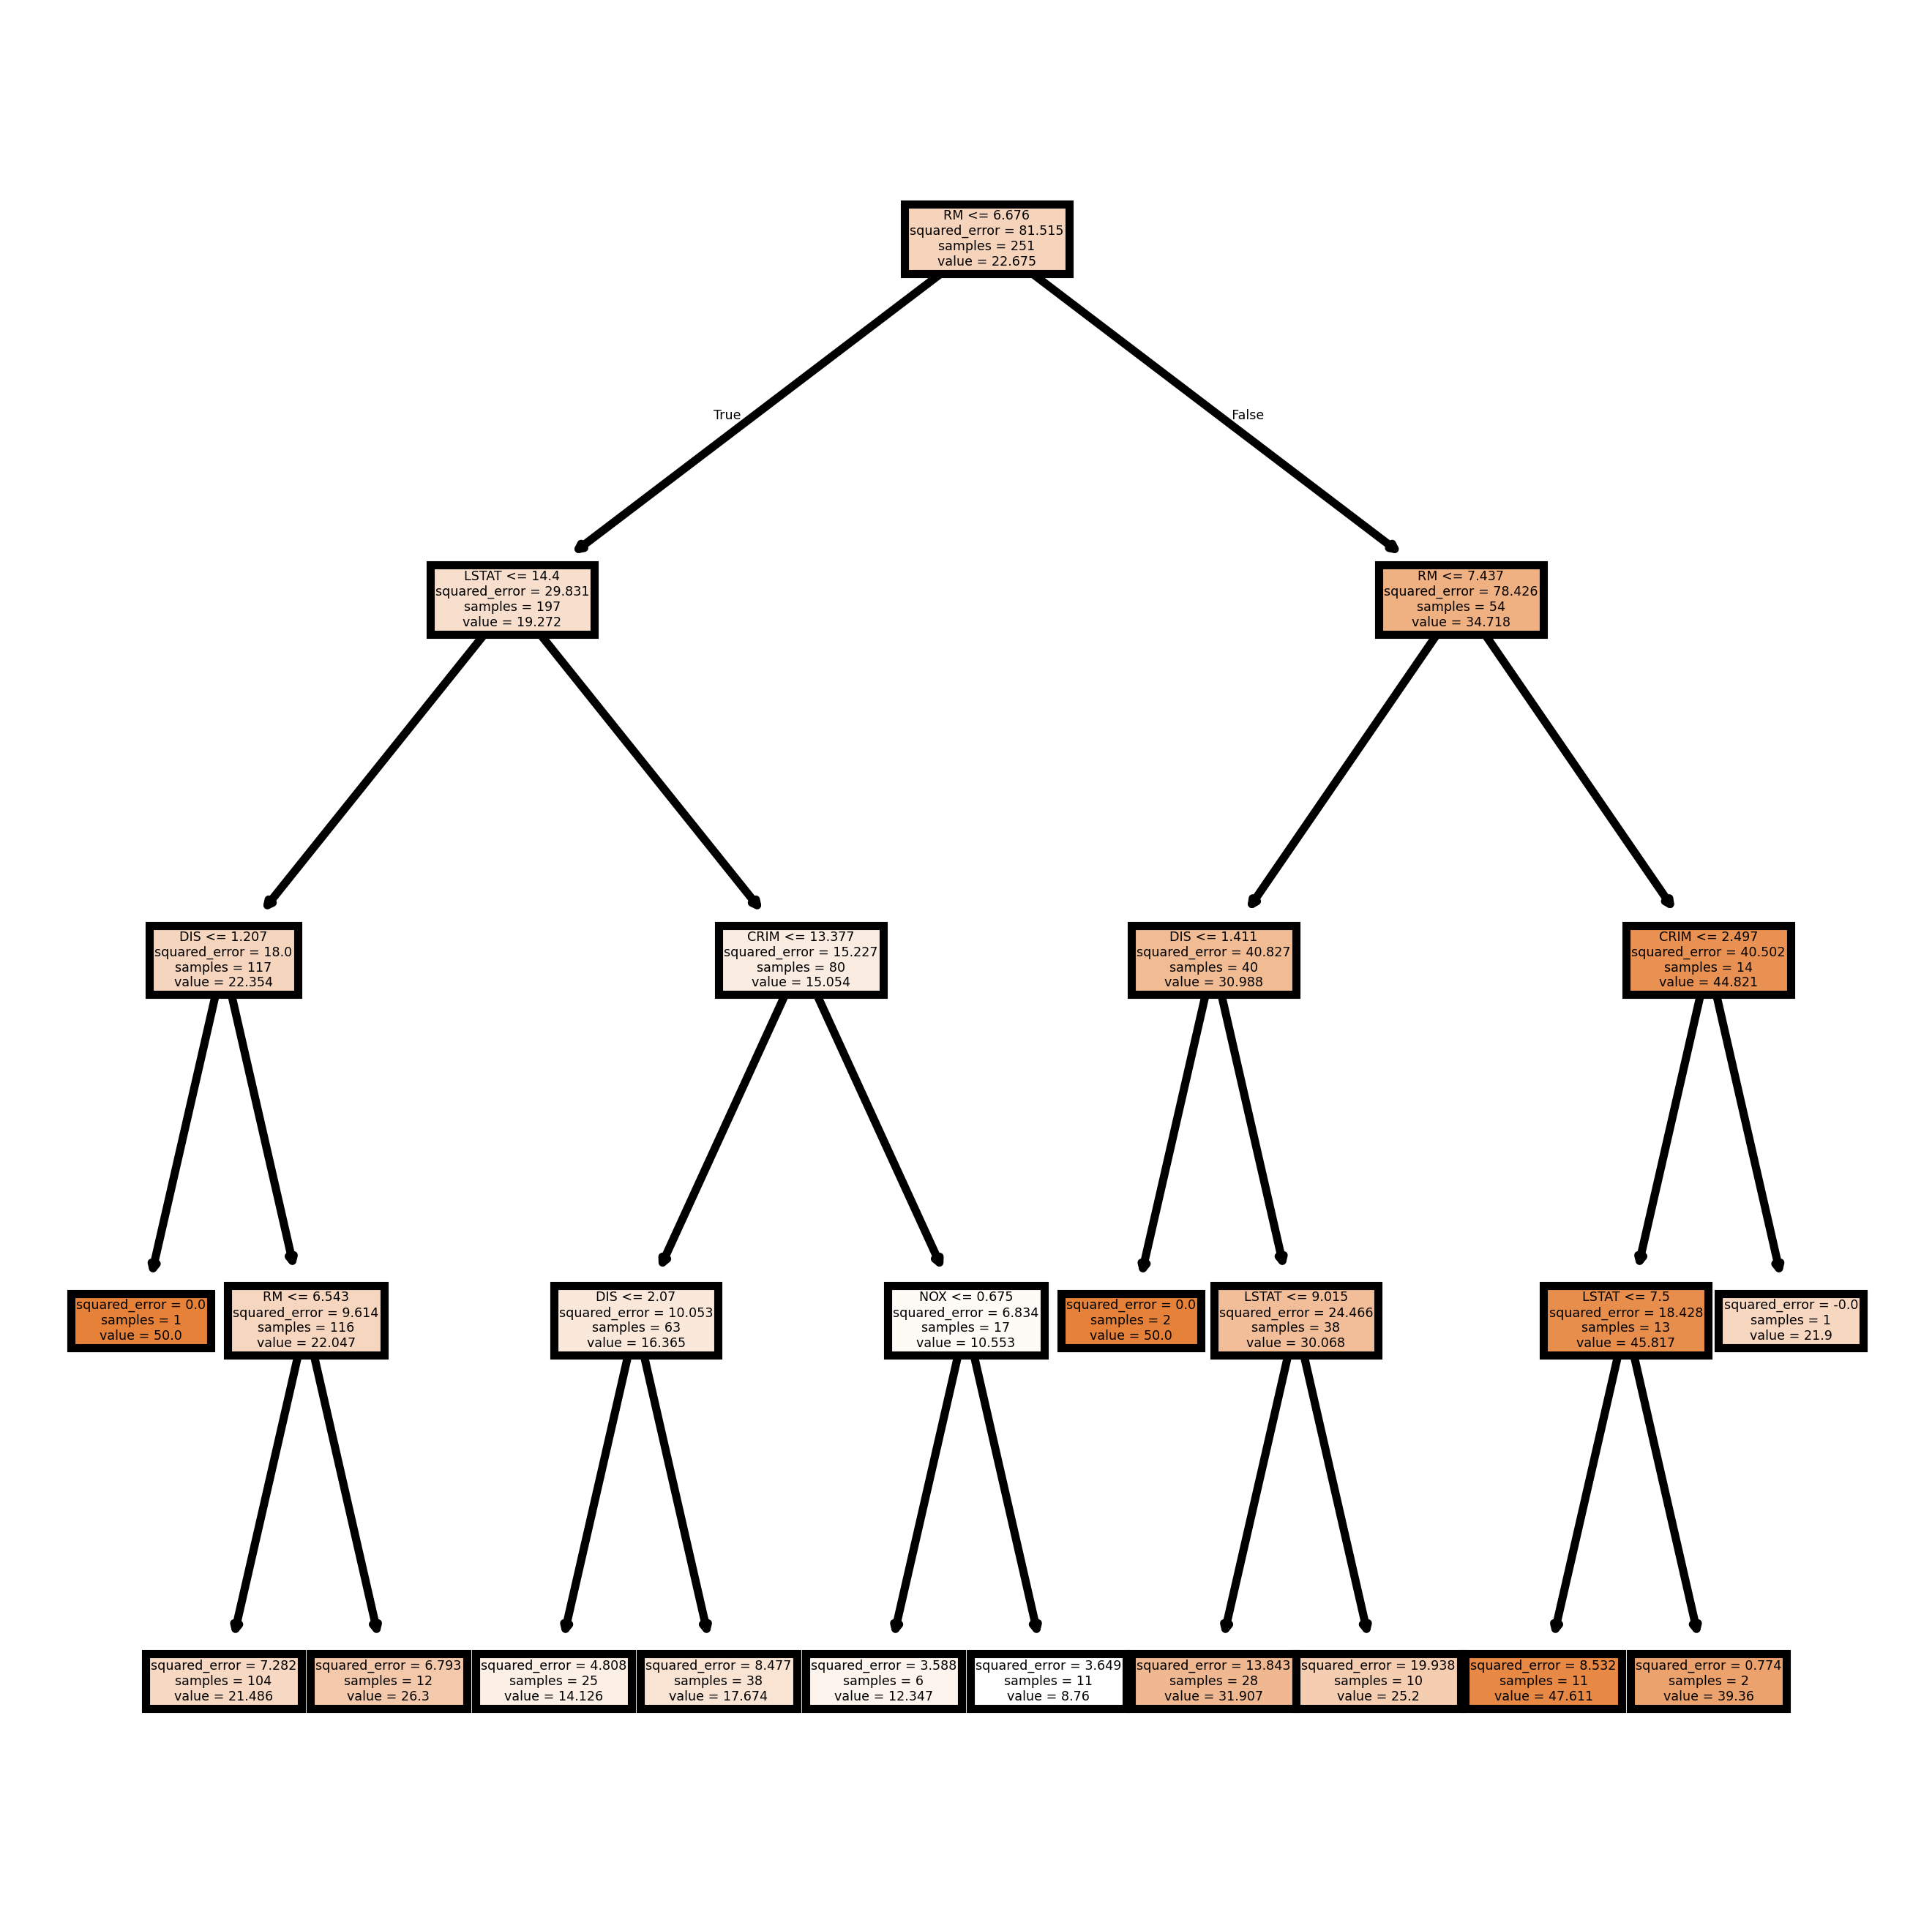

In [72]:
# generate a graph of the generated forest
fn=df.columns
cn=y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_Model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

## Upsilon Funktion

In [73]:
import statistics
def upsilon(porig, pexp):
    ASE  = statistics.mean((porig-pexp)**2)
    ASE0 = statistics.mean((porig-statistics.mean(porig))**2)
    ups = 1- ASE/ASE0
    return ups

In [74]:
from sklearn.ensemble import HistGradientBoostingRegressor
surrTar = rf_Model.predict(X_train)
surrGrove = HistGradientBoostingRegressor(learning_rate=0.1, random_state=42)
print("surrTar: {}".format(surrTar.shape))
print("X_train: {}".format(X_train.shape))

surrTar: (404,)
X_train: (404, 13)


In [75]:
surrGrove.fit(X_train,surrTar)
sg_pred = surrGrove.predict(X_train)
print(metrics.mean_squared_error(y_train, sg_pred))

11.367576312381738


In [76]:
print(surrTar.shape)
print(sg_pred.shape)

(404,)
(404,)


In [77]:
upsilon(surrTar,sg_pred)

0.9860849490361242

## Testarea

In [78]:
grove = list([rf_Model[0],rf_Model[1]])
grove.append(rf_Model[19])

In [79]:
print(grove)

[DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=1608637542), DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=1273642419), DecisionTreeRegressor(max_depth=4, max_features=1.0, random_state=648061058)]


In [80]:
print(surrGrove.__init__)

<bound method HistGradientBoostingRegressor.__init__ of HistGradientBoostingRegressor(random_state=42)>


In [81]:
for i in data.index:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [82]:
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [83]:
from sklearn.ensemble import GradientBoostingRegressor 
SG = GradientBoostingRegressor()
data2 = data.dropna()
df = pd.DataFrame(data2)
y = pd.DataFrame(data2['MEDV'])
df = df.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=0.2, random_state=42)

predictions = SG.fit(X_train, y_train)

C:\Users\jjacq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [84]:
tree1 = SG.estimators_[0,0].tree_

print(tree1)

In [85]:
for i in range(tree1.node_count):
    print(tree1.children_left[i])

1
2
3
-1
-1
6
-1
-1
9
10
-1
-1
13
-1
-1


In [86]:
for i in range(tree1.node_count):
    print(tree1.value[tree1.children_left[i]])

[[-2.6298647]]
[[0.88464286]]
[[-0.37303258]]
[[-0.09333333]]
[[-0.09333333]]
[[-6.03861635]]
[[-0.09333333]]
[[-0.09333333]]
[[11.50266667]]
[[10.815]]
[[-0.09333333]]
[[-0.09333333]]
[[23.62333333]]
[[-0.09333333]]
[[-0.09333333]]


In [87]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0], 
                   'C': [1j, 2j, 3j], 'D': ['a', 'b', 'c']})
for i in df.columns:
    print(pd.api.types.is_numeric_dtype(i))

False
True
False
True


In [88]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

A     True
B     True
C     True
D    False
dtype: bool

In [89]:
for i in df.columns:
    if pd.api.types.is_string_dtype(i) or df[i].dtype == object:
        print(i+": Kategorisch")
    elif pd.api.types.is_numeric_dtype(i) or np.issubdtype(df[i].dtype, np.number):
        print(i+": Numerisch")
    else:
        print(i+": string or some shit")

A: Numerisch
B: Numerisch
C: Numerisch
D: Kategorisch


In [90]:
for i in df.columns:
    print(df[i])

0    1
1    2
2    3
Name: A, dtype: int64
0    1.0
1    2.0
2    3.0
Name: B, dtype: float64
0    0.0+1.0j
1    0.0+2.0j
2    0.0+3.0j
Name: C, dtype: complex128
0    a
1    b
2    c
Name: D, dtype: object


In [91]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
data_encoded = pd.get_dummies(df, columns=categorical_columns)
df = pd.DataFrame(data_encoded)
for i in df.columns:
    if pd.api.types.is_string_dtype(i) or df[i].dtype == object:
        categories = df[i].cat.categories
        print(categories)


In [92]:
df.head()

,A,B,C,D_a,D_b,D_c
0,1,1.0,0.0+1.0j,True,False,False
1,2,2.0,0.0+2.0j,False,True,False
2,3,3.0,0.0+3.0j,False,False,True


In [93]:
columns = df.columns
print(df[columns[1]])

0    1.0
1    2.0
2    3.0
Name: B, dtype: float64


In [94]:
li = pd.DataFrame()
li.index = ["0","1","2","3","4"]
print(li)
# li.columns = ["a","b","c","d","e"]
for d in range(5):
    print(d)
    print(li.index[d])
    li.loc[[str(d)]] = d**d
    print(li.loc[[str(d)]] == d**d)
print(li)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
0
0
Empty DataFrame
Columns: []
Index: [0]
1
1
Empty DataFrame
Columns: []
Index: [1]
2
2
Empty DataFrame
Columns: []
Index: [2]
3
3
Empty DataFrame
Columns: []
Index: [3]
4
4
Empty DataFrame
Columns: []
Index: [4]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [95]:
df = pd.DataFrame(data2)
y = pd.DataFrame(data2['MEDV'])
df = df.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train}, y_train: {y_train}")

X_train:         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
421  7.02259  0.0  18.10   0.0  0.718  6.006  95.3  1.8746   24  666     20.2   
232  0.57529  0.0   6.20   0.0  0.507  8.337  73.3  3.8384    8  307     17.4   
218  0.11069  0.0  13.89   1.0  0.550  5.951  93.8  2.8893    5  276     16.4   
75   0.09512  0.0  12.83   0.0  0.437  6.286  45.0  4.5026    5  398     18.7   
439  9.39063  0.0  18.10   0.0  0.740  5.627  93.9  1.8172   24  666     20.2   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
84   0.05059  0.0   4.49   0.0  0.449  6.389  48.0  4.7794    3  247     18.5   
128  0.32543  0.0  21.89   0.0  0.624  6.431  98.8  1.8125    4  437     21.2   
345  0.03113  0.0   4.39   0.0  0.442  6.014  48.5  8.0136    3  352     18.8   
448  9.32909  0.0  18.10   0.0  0.713  6.185  98.7  2.2616   24  666     20.2   
122  0.09299  0.0  25.65   0.0  0.581  5.961  92.9  2.0869    2  188     19.1   

          B  LSTAT

In [111]:
surrogate_trees = []
cparam = 1
maxd = [1,2,3,4,5]
explanation = pd.DataFrame()
#explanation.columns = ["trees","rules","upsilon","cor"]
for md in maxd:
# min_samples_split = minsplit, min_samples_leaves = minbucket?
        model = tree.DecisionTreeRegressor(max_depth=md, ccp_alpha=cparam, min_samples_split = 2, min_samples_leaf = 1).fit(X=X_train, y=y_train)
        t = model.tree_
        features = t.feature
        thresholds = t.threshold
        rules = []
        cat_att = []
        for feature in features:
                print(X_train.columns[feature])
                if X_train.columns[feature].dtype == pd.Categorical or pd.api.types.is_string_dtype(X_train.columns[feature]) or X_train.columns[feature].dtype == object:
                        cat_att.append(X_train.columns[feature])
        for node in range(t.node_count):
                if features[node] != -2:
                        rule = {
                            'feature': t.feature[node],
                            'threshold': t.threshold[node],
                            'pleft': t.value[t.children_left[node]][0][0],
                            'pright': t.value[t.children_right[node]][0][0]
                        }
                        rules.append(rule)
        surrogate_trees.append(pd.DataFrame(rules))
        if len(surrogate_trees[md-maxd[0]]) == 0:
                explanation.append(pd.DataFrame({
                        "trees": 1,
                        "rules": 0,
                        "upsilon": 0,
                        "cor": 0
                }))
                surrogate_trees[md] = None

        # if len(surrogate_trees[md-maxd[0]] > 0):
                
        #         print("yea it is")
        print(cat_att)
        print(surrogate_trees[md-maxd[0]]["feature"])
        for j in range(1,len(surrogate_trees[md-maxd[0]])):
                if X_train.columns[surrogate_trees[md-maxd[0]]["feature"]] in cat_att:
                        print(X_train.columns[surrogate_trees[md-maxd[0]]["feature"]])
        
print(surrogate_trees)
print(explanation)
        # TODO: splits äquivalent finden
    

RM


AttributeError: 'str' object has no attribute 'dtype'

In [56]:

#     # Numeric columns   
#     elif pd.api.types.is_numeric_dtype(features[node]) or np.issubdtype(features[node].dtype, np.number):
        
#     else:
#         print(i+": uncaught case please contact a dev")
# st["ncat"] = ncat

AttributeError: 'sklearn.tree._tree.Tree' object has no attribute 'features'

In [146]:
print(surrogate_trees[1][0][1])

6.971499919891357


In [4]:
for node in surrogate_trees:
    print


TypeError: unsupported operand type(s) for -: 'str' and 'int'